<a href="https://colab.research.google.com/github/sidharth-ds/Image-Audio-basics/blob/main/Audio_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import wave, struct, math, random

sr = 44100.0    # sample rate
duration = 1.0
freq = 440.0      # noise frequency
f = wave.open("sample.wav","w")   # writing an audio file

f.setnchannels(1)   # 1: mono audio
f.setsampwidth(2)
f.setframerate(sr)  

for i in range(99999):
    value = random.randint(-32768,32767)
    data = struct.pack('<h',value)        # generating audio data
    f.writeframesraw(data)            # passing the data into the frame

f.close()


In [2]:
f = wave.open("sample.wav","r")     # reading the file

print(f.getnchannels(),f.getsampwidth(),f.getframerate(),f.getnframes())
print(f.getparams())      # all parameters

f.close()


1 2 44100 99999
_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=99999, comptype='NONE', compname='not compressed')


In [3]:
!git clone https://github.com/AllenDowney/ThinkDSP.git

import sys
sys.path.insert(0,"ThinkDSP/code/")

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2445, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2445 (delta 12), reused 8 (delta 4), pack-reused 2421
Receiving objects: 100% (2445/2445), 207.88 MiB | 22.19 MiB/s, done.
Resolving deltas: 100% (1332/1332), done.
Checking out files: 100% (302/302), done.


### Audio file 1:

In [4]:
import thinkdsp

In [5]:
from thinkdsp import read_wave

x = read_wave("/content/sample.wav")

In [6]:
x.make_audio()

### Audio file 2:

In [7]:
import matplotlib.pyplot as plt


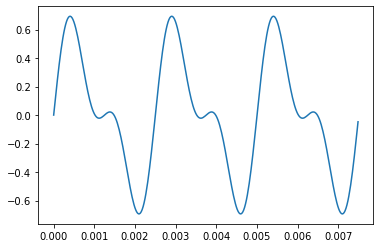

Writing sound.wav


In [17]:
sin1 = thinkdsp.SinSignal(freq=400,amp=0.5)
sin2 = thinkdsp.SinSignal(freq=800,amp=0.3)
new = sin1+sin2
wave = new.make_wave(duration=2,start=0,framerate=44100)    # creating a wave file

period = new.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
plt.show()

wave.play()
x = read_wave("/content/sound.wav")
x.make_audio()


### Audio file 3:

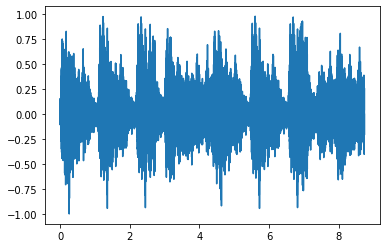

In [9]:
wave = read_wave("/content/ThinkDSP/code/170255__dublie__trumpet.wav")
wave.plot()
wave.make_audio()


* setting start & duartion value:

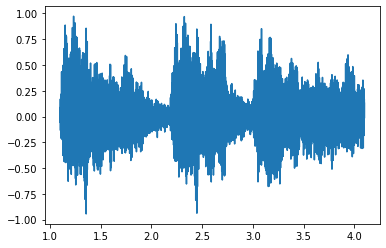

In [15]:
y = wave.segment(start=1.1,duration=1)
y.plot()
y.make_audio()

* using Widgets:

In [11]:
from thinkdsp import decorate


In [12]:
def filter_wave(wave,start,duration,cutoff):
    segment = wave.segment(start,duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000,color='r')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000,color='g')
    
    decorate(xlabel="freq")

    audio=spectrum.make_wave().make_audio()
    display(audio)


In [13]:
from ipywidgets import interact, fixed

interact(filter_wave,wave=fixed(wave),start=(0,5,0.1),duration=(0,5,0.1),cutoff=(0,5000,100))


interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

<function __main__.filter_wave>